In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from unidecode import unidecode
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
pd.set_option('expand_frame_repr', True)
pd.set_option('display.column_space', 6)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.show_dimensions', True)

# Data Cleaning

This notebook shows the steps taken to clean the data prepared on the last notebook *1-Data Preparation*.

In [2]:
CURRENT_WORK_DIRECTORY = Path().resolve().parents[0]

INTERIM_DATA_FOLDER = CURRENT_WORK_DIRECTORY / 'data/interim/'
PROCESSED_DATA_FOLDER = CURRENT_WORK_DIRECTORY / 'data/processed/'
FIGURES_FOLDER = CURRENT_WORK_DIRECTORY / 'reports/figures/cleaning/'

PROCESSED_DATA_FOLDER.mkdir(exist_ok=True, parents=True)
FIGURES_FOLDER.mkdir(exist_ok=True, parents=True)

## Data Loading

In [3]:
data_df = pd.read_csv(INTERIM_DATA_FOLDER / 'fake_true_news.csv')

display(data_df.shape)
data_df.head()

(7200, 28)

,class,file_index,text,author,link,category,date_of_publication,tokens,words_no_punctuation,types,links_inside,upper_words,verbs,subjuntive_imperative_verbs,nouns,adjectives,adverbs,modal_verbs,singular_first_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity
0,True,1,﻿O Podemos decid...,Naira Trindade,http://politica....,politica,13/12/2017,168.0,148.0,107.0,NaN,0.0,24.0,2.0,43.0,5.0,4.0,3.0,0.0,0.0,7.0,3.33333,761.0,24.6667,5.14189,0.000000,0.134328,0.72297
1,True,10,Bolsonaro é um l...,Marco Rodrigo Al...,http://www1.folh...,politica,12/1/2018,1028.0,865.0,474.0,NaN,9.0,135.0,2.0,237.0,56.0,45.0,14.0,3.0,1.0,63.0,2.85965,4205.0,15.1754,4.86127,0.001156,0.271505,0.54797
2,True,100,Ministro do STF ...,"Fernando Zuba , ...",https://g1.globo...,politica,7/12/2017,540.0,476.0,232.0,NaN,8.0,69.0,0.0,146.0,10.0,20.0,7.0,0.0,0.0,19.0,3.04762,2399.0,22.6667,5.03992,0.000000,0.139535,0.48739
3,True,1000,Apesar da abundâ...,Por Anderson Vi...,https://g1.globo...,politica,31/10/2017 10h17,8634.0,7588.0,2199.0,0.0,52.0,1053.0,29.0,2170.0,443.0,278.0,174.0,0.0,2.0,384.0,3.36334,37381.0,24.3987,4.92633,0.002504,0.223705,0.28900
4,True,1001,Por que Harvard ...,Por BBC,https://g1.globo...,politica,05/04/2017 09h08,955.0,823.0,452.0,0.0,10.0,96.0,1.0,262.0,36.0,50.0,8.0,0.0,0.0,33.0,3.14286,4239.0,19.5952,5.15067,0.000000,0.240223,0.54920


## Text Preprocessing

For the texts we only mantained the tokens available on texts and authors. An example of a text before cleaning can be seen below:

In [4]:
data_df.text.iloc[2]

'Ministro do STF libera Andrea Neves de prisão domiciliar\n\nDecisão de Marco Aurélio Mello vale para irmã de Aécio Neves e também para Frederico Pacheco, primo do senador, e Mendherson Souza Lima, ex-assessor parlamentar de Zeze Perrella.\n\nO ministro do Supremo Tribunal Federal (STF) Marco Aurélio Mello liberou Andrea Neves, irmã do senador Aécio Neves (PSDB-MG), da prisão domiciliar e do uso de tornozeleira eletrônica. A decisão também vale para Frederico Pacheco, primo do senador, e Mendherson Souza Lima, ex-assessor parlamentar do senador Zeze Perrella (PMDB-MG).\n\nPublicada nesta quarta-feira (6), a decisão retira ainda as outras medidas cautelares impostas a eles, como a proibição de sair do país, a obrigação de entrega do passaporte, e a restrição de manter contato com os demais investigados, entre eles Aécio Neves.\n\nAndrea, Frederico e Mendherson são investigados junto com Aécio por suposta prática de corrupção, organização criminosa e embaraço às investigações da Lava Jat

After cleaning

In [5]:
def text_base_cleaning(series):
    series = series.str.lower()
    series = series.str.strip()
    series = series.str.replace(r"\\t|\\n|\\r", "", regex=True)
    series = series.str.replace(r"\t|\n|\r", "", regex=True)
    series = series.str.replace('[^\w\s]', '', regex=True) # Removing Punctuation
    series = series.str.replace("  ", " ") # Removing Extra spaces
    series = series.apply(lambda x: unidecode(x) if isinstance(x, str) else np.nan)
    return series

data_df.text = text_base_cleaning(data_df.text)
data_df.author = text_base_cleaning(data_df.author)

data_df.iloc[2].text

'ministro do stf libera andrea neves de prisao domiciliardecisao de marco aurelio mello vale para irma de aecio neves e tambem para frederico pacheco primo do senador e mendherson souza lima exassessor parlamentar de zeze perrellao ministro do supremo tribunal federal stf marco aurelio mello liberou andrea neves irma do senador aecio neves psdbmg da prisao domiciliar e do uso de tornozeleira eletronica a decisao tambem vale para frederico pacheco primo do senador e mendherson souza lima exassessor parlamentar do senador zeze perrella pmdbmgpublicada nesta quartafeira 6 a decisao retira ainda as outras medidas cautelares impostas a eles como a proibicao de sair do pais a obrigacao de entrega do passaporte e a restricao de manter contato com os demais investigados entre eles aecio nevesandrea frederico e mendherson sao investigados junto com aecio por suposta pratica de corrupcao organizacao criminosa e embaraco as investigacoes da lava jato eles ja foram denunciadosandrea neves foi pres

## Exploratory Data Analysis for Cleaning

By analyzing some basic statistics below, some conclusions are:

* Based on the **unique count** of the *text* variable we have a duplicated text
* The same analysis on *link* also show some duplicated links that can indicate duplicated rows (we expected a unique link for each news)
* Lots of zero values on *links_inside*, *singular_first_second_personal_pronouns*, *plural_first_personal_pronouns*
* Some of missing values in *author* and *links_inside*

In [6]:
data_df.describe(include="all")

,class,file_index,text,author,link,category,date_of_publication,tokens,words_no_punctuation,types,links_inside,upper_words,verbs,subjuntive_imperative_verbs,nouns,adjectives,adverbs,modal_verbs,singular_first_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity
count,7200,7200.000000,7200,3625,7200,7200,7200,7200.000000,7200.000000,7200.000000,5807.000000,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
unique,2,NaN,7199,1374,7183,6,3689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Fake,NaN,suplicy particip...,por g1,https://g1.globo...,politica,4/1/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3600,NaN,2,333,2,4180,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1801.899444,NaN,NaN,NaN,NaN,NaN,742.763333,646.172222,306.896250,0.215085,7.680694,100.76750,4.063194,182.920278,33.154444,30.014444,13.869028,1.835556,0.502639,38.758056,2.755722,3138.628333,18.229019,4.845171,0.003065,0.209758,0.571431
std,NaN,1039.990969,NaN,NaN,NaN,NaN,NaN,774.155454,674.901525,260.201075,0.604319,9.860613,108.03151,5.492677,186.507322,39.702327,37.742105,15.303212,6.666706,1.697008,51.759915,1.154137,3283.090323,6.090270,0.246260,0.007780,0.070239,0.135244
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,11.000000,9.000000,9.000000,0.000000,0.000000,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,34.000000,2.666670,3.615940,0.000000,0.000000,0.000000
25%,NaN,901.750000,NaN,NaN,NaN,NaN,NaN,183.000000,157.000000,106.000000,0.000000,2.000000,26.00000,1.000000,46.000000,7.000000,7.000000,3.000000,0.000000,0.000000,8.000000,2.166670,755.000000,14.372850,4.696408,0.000000,0.162500,0.468598
50%,NaN,1802.500000,NaN,NaN,NaN,NaN,NaN,416.000000,362.000000,208.000000,0.000000,5.000000,57.00000,2.000000,106.000000,18.000000,15.000000,8.000000,0.000000,0.000000,19.000000,2.684015,1756.500000,18.115250,4.846540,0.000579,0.204082,0.573495
75%,NaN,2702.250000,NaN,NaN,NaN,NaN,NaN,1064.250000,928.250000,440.000000,0.000000,10.000000,141.00000,5.000000,265.000000,45.000000,39.000000,19.000000,1.000000,0.000000,49.000000,3.224992,4523.000000,21.823775,4.994038,0.003799,0.251055,0.674030


### Duplicated Values

#### Duplicated values on all columns

In [7]:
dup_all_columns = data_df[data_df.duplicated(keep=False)]

print(f'# dupes: {len(dup_all_columns)}')
dup_all_columns

# dupes: 0


,class,file_index,text,author,link,category,date_of_publication,tokens,words_no_punctuation,types,links_inside,upper_words,verbs,subjuntive_imperative_verbs,nouns,adjectives,adverbs,modal_verbs,singular_first_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity


#### Duplicated values only on text variable

In [8]:
dup_text_column = data_df[data_df.duplicated(['text'], keep=False)]

print(f'# dupes: {len(dup_text_column)}')
display(dup_text_column)

# dupes: 2


,class,file_index,text,author,link,category,date_of_publication,tokens,words_no_punctuation,types,links_inside,upper_words,verbs,subjuntive_imperative_verbs,nouns,adjectives,adverbs,modal_verbs,singular_first_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity
3169,True,61,suplicy particip...,monica bergamo,http://www1.folh...,tv_celebridades,9/8/2017,160.0,136.0,97.0,NaN,4.0,12.0,0.0,52.0,4.0,3.0,1.0,0.0,0.0,4.0,4.0,614.0,22.6667,4.51471,0.0,0.109375,0.71323
3257,True,69,suplicy particip...,NaN,http://g1.globo....,politica,7/10/2017,160.0,136.0,97.0,NaN,4.0,12.0,0.0,52.0,4.0,3.0,1.0,0.0,0.0,4.0,4.0,614.0,22.6667,4.51471,0.0,0.109375,0.71323


The elements above have different links and publication dates but are equal for all other values. By looking at the links manually we see that the row `3257` redirects to a completly different news, this is the element that we are going to drop.

#### Duplicated values only on links variable

In [9]:
dup_links_column = data_df[data_df.duplicated(['link'], keep=False)].sort_values('link')

print(f'# dupes: {len(dup_links_column)}')
dup_links_column.head()

# dupes: 34


,class,file_index,text,author,link,category,date_of_publication,tokens,words_no_punctuation,types,links_inside,upper_words,verbs,subjuntive_imperative_verbs,nouns,adjectives,adverbs,modal_verbs,singular_first_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity
2144,True,293,as luleculas de ...,jose neumanne,http://politica....,politica,5/3/2018,1708.0,1509.0,730.0,NaN,15.0,244.0,11.0,383.0,88.0,94.0,34.0,3.0,0.0,140.0,3.37288,6913.0,25.5763,4.58118,0.005964,0.290271,0.48376
1281,True,2152,lula nunca foi m...,jose neumanne,http://politica....,politica,05 de março de ...,1689.0,1492.0,728.0,0.0,11.0,243.0,11.0,377.0,88.0,94.0,34.0,3.0,0.0,137.0,3.33898,6839.0,25.2881,4.58378,0.005362,0.293548,0.48793
1475,True,2327,o pedido do pref...,jose neumanne,http://politica....,politica,05 de janeiro d...,2334.0,2045.0,874.0,0.0,11.0,301.0,12.0,606.0,100.0,91.0,41.0,1.0,1.0,106.0,3.24719,9904.0,22.9775,4.84303,0.001956,0.210584,0.42738
1544,True,239,lenha pra foguei...,jose neumanne,http://politica....,politica,5/1/2018,171.0,156.0,94.0,NaN,0.0,26.0,3.0,46.0,6.0,5.0,3.0,0.0,0.0,5.0,2.14286,657.0,22.2857,4.21154,0.000000,0.152778,0.60256
1678,True,251,o paraiso dos in...,jose neumanne,http://politica....,politica,25/10/2017,2206.0,1997.0,868.0,NaN,15.0,294.0,9.0,575.0,107.0,106.0,41.0,0.0,1.0,104.0,2.54878,9547.0,24.3537,4.78067,0.002003,0.245109,0.43465


The table above shows some duplicated cases based on links. For all the cases (including the ones not shown above) we have rows with equal links but truncated versions of the full text (and consequently different calculated variables). For these cases our criteria is to keep the rows with greater number of tokens.

#### Dropping Values

In [10]:
# Duplicated values only on text variable
try:
    data_df = data_df.drop(index=3257)
except KeyError:
    pass

# Duplicated values only on links variable
data_df = data_df.sort_values('tokens', ascending=False)
data_df = data_df.drop_duplicates(['link'], keep='first')

# Checking Correct Drop
print(f"# dupes (text): {len(data_df[data_df.duplicated(['text'], keep=False)])}")
print(f"# dupes (link): {len(data_df[data_df.duplicated(['link'], keep=False)])}")
print(f"Shape: {data_df.shape}")
print(f"# True: {data_df['class'].value_counts()['True']}, # Fake: {data_df['class'].value_counts()['Fake']}")

# dupes (text): 0
# dupes (link): 0
Shape: (7182, 28)
# True: 3582, # Fake: 3600


### Non-informative columns

By looking at the distribution of the variables below, besides the great number of 0's there isn't any evidence of errors. Also, a manual analysis is impractical. We chose to maintain these variables

<AxesSubplot:xlabel='plural_first_personal_pronouns', ylabel='count'>

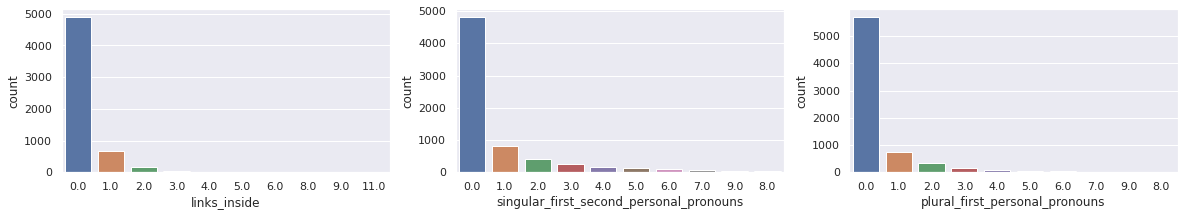

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))

sns.countplot(x="links_inside", data=data_df, ax=ax1)
sns.countplot(
    x="singular_first_second_personal_pronouns", data=data_df, ax=ax2, 
    order=data_df.singular_first_second_personal_pronouns.value_counts().iloc[:10].index
)
sns.countplot(
    x="plural_first_personal_pronouns", data=data_df, ax=ax3,
  order=data_df.plural_first_personal_pronouns.value_counts().iloc[:10].index
)

There is also other metadata columns that will not be used for the study. We can drop they:

In [12]:
try:
    data_df = data_df.drop(columns=['file_index', 'category', 'date_of_publication'])
except KeyError:
    pass

### Missing Values Analysis

The graphic below show the missing values for the dataset. **NOTE:** The data present in the dataset is ordered by class, where the true rows are the first ones.

<AxesSubplot:>

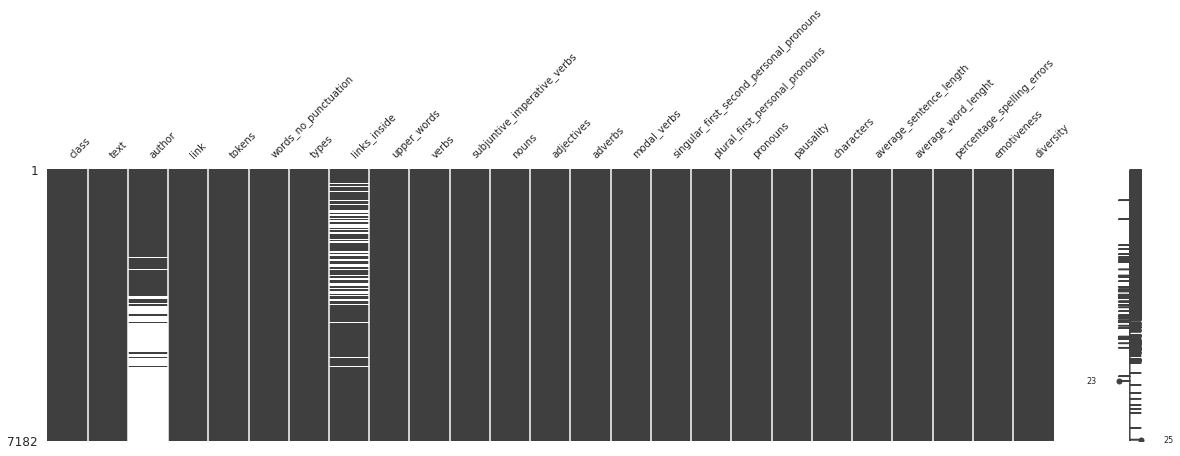

In [13]:
msno.matrix(data_df, figsize=(20, 5), fontsize=10, sparkline=True)

#### Authors

In [14]:
print(f"% of Missing Values (True): {100 * data_df[data_df['class'] == 'True'].author.isna().sum() / len(data_df[data_df['class'] == 'True'])}")
print(f"% of Missing Values (Fake): {100 * data_df[data_df['class'] == 'Fake'].author.isna().sum() / len(data_df[data_df['class'] == 'Fake'])}")

% of Missing Values (True): 1.256281407035176
% of Missing Values (Fake): 98.0


By manually analyzing some of the links, many of than were inaccessible by the time of the study and others really don't show the author information. But since we cannot be sure what is th

#### Links Inside

In [15]:
print(f"% of Missing Values (True): {100 * data_df[data_df['class'] == 'True'].links_inside.isna().sum() / len(data_df[data_df['class'] == 'True'])}")
print(f"% of Missing Values (Fake): {100 * data_df[data_df['class'] == 'Fake'].links_inside.isna().sum() / len(data_df[data_df['class'] == 'Fake'])}")

% of Missing Values (True): 38.58179787828029
% of Missing Values (Fake): 0.0


#### Dropping Values

For both variables we have a great number of missing values. By manually analyzing some links for both variables they seen to be errors on collection and nothing related to the phenomenon. We chose to drop both variables.

In [16]:
data_df = data_df.drop(columns=['author', 'links_inside'])
print(data_df.shape)

(7182, 23)


### Outlier Analysis

To finish, we did an outlier analysis on all our continous variables. The boxplots are shown below:

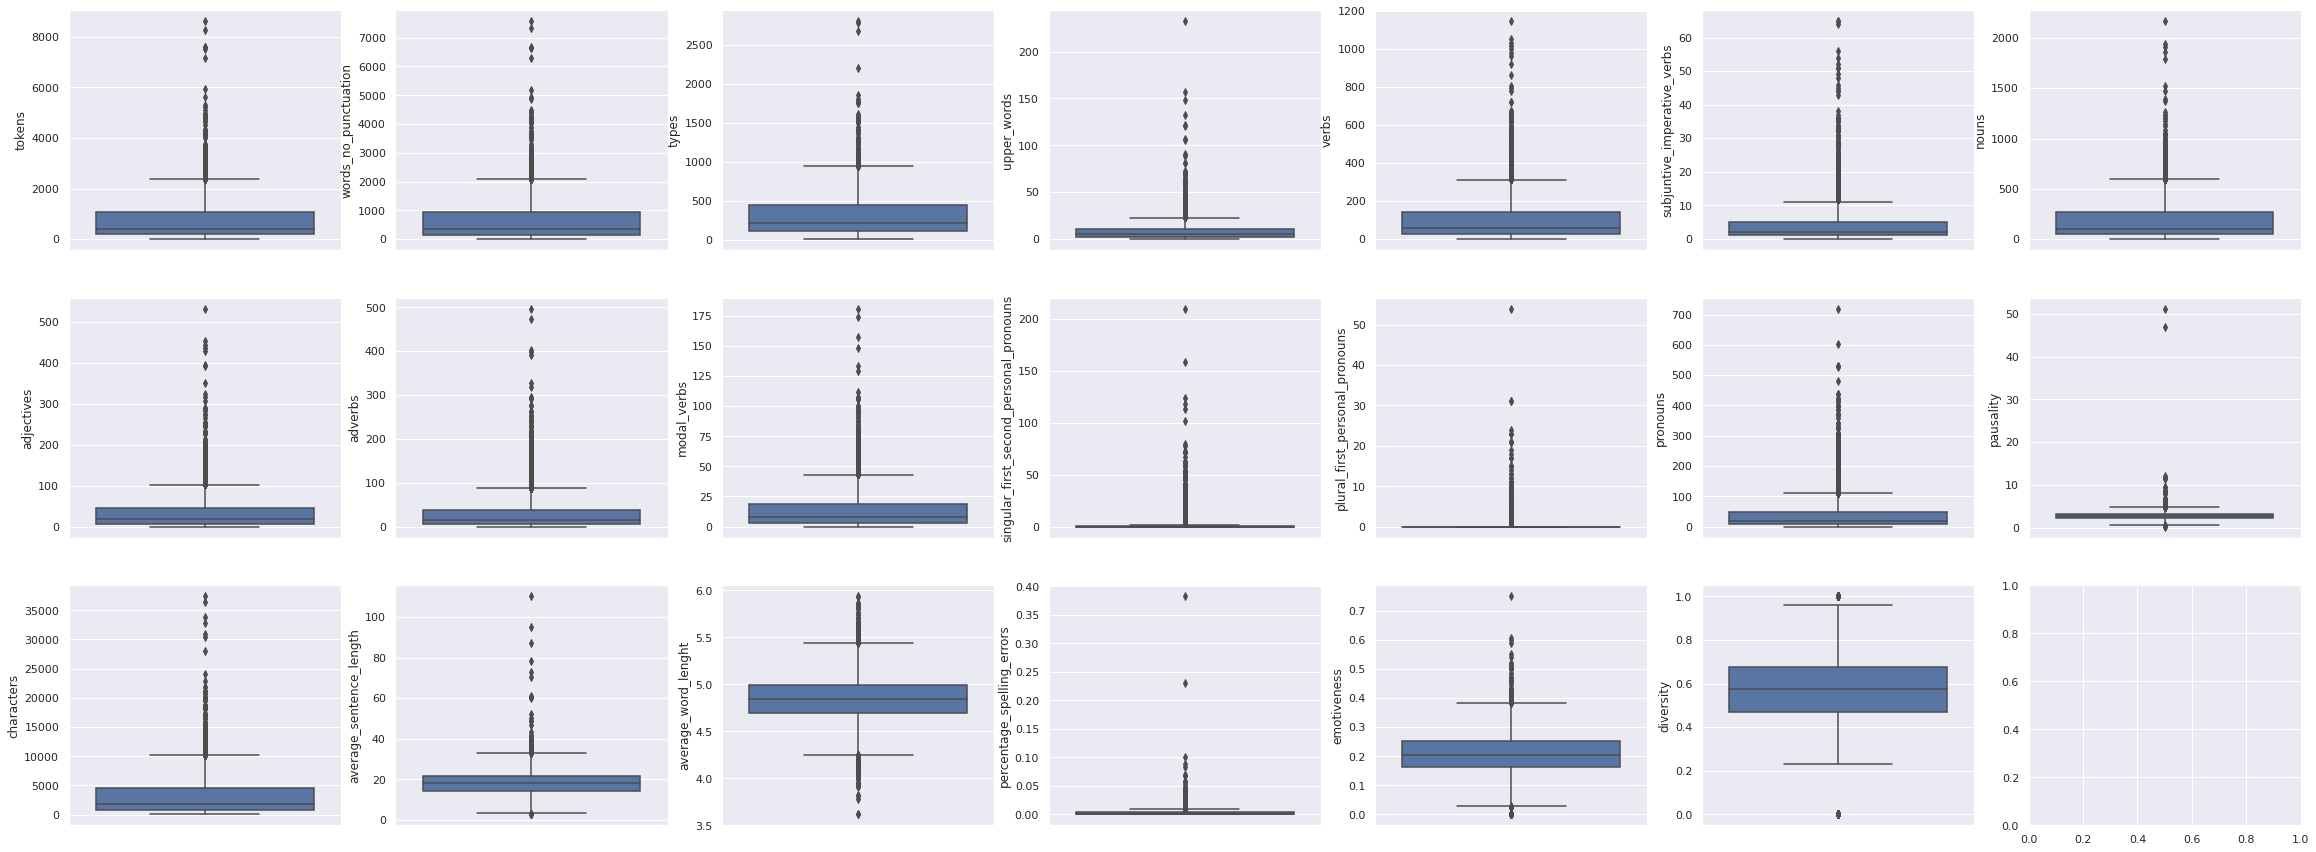

In [17]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]

# Box Plot Grid
boxplot_fig, boxplot_axes = plt.subplots(ncols=7, nrows=3, figsize=(40, 15), sharex=False, sharey=False)
for col, ax in zip(CONTINUOUS_VARIABLES, boxplot_axes.flat):
    sns.boxplot(y=col, data=data_df[CONTINUOUS_VARIABLES], ax=ax)

The objective is to find outliers that may be errors of the dataset, from this point of view 3 variables can be highlighted: *upper_words, spelling_errors, pausality*. Note that we used IQR as the criteria for defining an outlier.

In [18]:
def iqr_outlier_finder(df, variable):
    q1 = df[variable].quantile(.25)
    q3 = df[variable].quantile(.75)
    iqr = q3 - q1
    q_hi = q3 + 1.5 * iqr
    q_low = q1 - 1.5 * iqr
    return df[(df[variable] >=  q_hi) | (df[variable] <= q_low)]

#### Upper words

By looking at the links for the news that most deviate below manually we found 2 cases: (i) Letters attached to the news and (ii) abbreviations of Brazilian political parties. For both cases their structure are composed by a lot of upper case words. So, we chose to maintain these values.

In [19]:
outliers_df = iqr_outlier_finder(data_df, "upper_words").sort_values('upper_words', ascending=False)
print(f'Number of Outliers: {len(outliers_df)}')
outliers_df.head()

Number of Outliers: 534


,class,text,link,tokens,words_no_punctuation,types,upper_words,verbs,subjuntive_imperative_verbs,nouns,adjectives,adverbs,modal_verbs,singular_first_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity
509,True,cartas pac 2 ano...,http://opiniao.e...,7608.0,6674.0,2782.0,233.0,1002.0,56.0,1863.0,428.0,403.0,108.0,13.0,4.0,482.0,2.54496,33862.0,18.1853,5.07372,0.023524,0.290052,0.41684
3021,True,cartas democraci...,http://opiniao.e...,8279.0,7348.0,2805.0,157.0,1148.0,64.0,1936.0,452.0,474.0,157.0,19.0,15.0,602.0,2.07812,36369.0,16.4018,4.94951,0.022319,0.300259,0.38173
2589,True,cartas apoio a c...,http://opiniao.e...,7516.0,6645.0,2680.0,148.0,1015.0,65.0,1791.0,395.0,392.0,112.0,8.0,9.0,528.0,2.41274,32770.0,18.4072,4.93153,0.021069,0.280470,0.40331
6754,Fake,lista dos 29 dep...,https://www.diar...,534.0,445.0,265.0,132.0,27.0,4.0,190.0,5.0,9.0,6.0,0.0,0.0,6.0,8.09091,2061.0,40.4545,4.63146,0.000000,0.064516,0.59550
3154,True,veja a ordem de ...,http://politica....,3079.0,2003.0,949.0,122.0,51.0,3.0,1141.0,17.0,26.0,3.0,0.0,0.0,17.0,51.23810,10115.0,95.3810,5.04993,0.000000,0.036074,0.47378


####  Spelling errors

The manual anaysis shows some english words inside the texts that probably were identified as errors in portuguese. One case, in particular is a very small text (12 words) with the word "fiocruz" (a brazilian science foundation). We also chose not to drop anything.

In [20]:
outliers_df = iqr_outlier_finder(data_df, "percentage_spelling_errors").sort_values('percentage_spelling_errors', ascending=False)
print(f'Number of Outliers: {len(outliers_df)}')
outliers_df.head()

Number of Outliers: 611


,class,text,link,tokens,words_no_punctuation,types,upper_words,verbs,subjuntive_imperative_verbs,nouns,adjectives,adverbs,modal_verbs,singular_first_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity
6836,Fake,internauta filma...,https://www.diar...,161.0,136.0,111.0,0.0,21.0,2.0,58.0,4.0,5.0,2.0,0.0,0.0,11.0,1.666670,597.0,9.06667,4.38971,0.382353,0.113924,0.81617
3236,True,nos cometemos er...,https://g1.globo...,2428.0,2215.0,832.0,1.0,343.0,43.0,899.0,75.0,95.0,32.0,4.0,6.0,185.0,1.954130,11026.0,20.32110,4.97788,0.231151,0.136876,0.37562
6965,Fake,brasileiro que m...,https://www.diar...,29.0,20.0,18.0,1.0,3.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,3.000000,107.0,6.66667,5.35000,0.100000,0.100000,0.00000
4591,Fake,midia internacio...,https://www.diar...,202.0,169.0,122.0,3.0,24.0,3.0,56.0,9.0,4.0,2.0,1.0,0.0,8.0,2.357140,758.0,12.07140,4.48521,0.088757,0.162500,0.72189
6076,Fake,fiocruz alerta q...,https://www.diar...,14.0,12.0,12.0,1.0,4.0,0.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.666667,58.0,4.00000,4.83333,0.083333,0.125000,1.00000


#### Pausality

The first link is a list of names. Since the pausality variable takes into account the number of dots it makes sense. The other texts have the same idea.

In [21]:
outliers_df = iqr_outlier_finder(data_df, "pausality").sort_values('pausality', ascending=False)
print(f'Number of Outliers: {len(outliers_df)}')
outliers_df.head()

Number of Outliers: 120


,class,text,link,tokens,words_no_punctuation,types,upper_words,verbs,subjuntive_imperative_verbs,nouns,adjectives,adverbs,modal_verbs,singular_first_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity
3154,True,veja a ordem de ...,http://politica....,3079.0,2003.0,949.0,122.0,51.0,3.0,1141.0,17.0,26.0,3.0,0.0,0.0,17.0,51.2381,10115.0,95.3810,5.04993,0.000000,0.036074,0.47378
1800,True,lula tem 34 bols...,https://g1.globo...,1317.0,801.0,186.0,15.0,41.0,2.0,352.0,25.0,7.0,1.0,0.0,0.0,18.0,46.9091,3436.0,72.8182,4.28964,0.001248,0.081425,0.23220
4729,Fake,forbes pele figu...,https://www.diar...,226.0,165.0,101.0,14.0,20.0,0.0,50.0,3.0,4.0,1.0,0.0,0.0,0.0,12.2000,902.0,33.0000,5.46667,0.000000,0.100000,0.61212
5503,Fake,r 11 milhoes do ...,https://www.diar...,252.0,182.0,114.0,17.0,14.0,0.0,65.0,8.0,3.0,1.0,0.0,0.0,4.0,11.6667,781.0,30.3333,4.29121,0.038462,0.139241,0.62637
6587,Fake,lula admite que ...,https://www.diar...,214.0,180.0,123.0,3.0,31.0,1.0,45.0,5.0,5.0,5.0,3.0,0.0,16.0,11.3333,759.0,60.0000,4.21667,0.000000,0.131579,0.68333


## Exporting the cleaned data

In [22]:
data_df.to_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned.csv")